In [18]:
from google.colab import files
import pandas as pd

# Upload the CSV file from your computer
uploaded = files.upload()

# Get the uploaded file name dynamically
filename = next(iter(uploaded))

# Load the CSV file into a DataFrame
df = pd.read_csv(filename)

# Show first few rows
df.head()


Saving project1.csv to project1.csv


,Country,"Yearly Water Used (m³, thouand of liters)",Daily Water Used Per Capita (liters),Population
0,Afghanistan,"20,28,00,00,000","2,843","1,95,42,982"
1,Albania,"1,31,10,00,000","1,196","30,03,387"
2,Algeria,"9,97,80,00,000",678,"4,03,39,329"
3,Angola,"70,58,00,000",99,"1,94,50,959"
4,Antigua and Barbuda,"1,15,00,000",359,"87,674"


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Yearly  Water Used (m³, thouand of liters)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Daily Water Used Per Capita (liters)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Population').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Yearly  Water Used (m³, thouand of liters)'].value_counts()
    for x_label, grp in _df_4.groupby('Country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country')
_ = plt.ylabel('Yearly  Water Used (m³, thouand of liters)')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Daily Water Used Per Capita (liters)'].value_counts()
    for x_label, grp in _df_5.groupby('Yearly  Water Used (m³, thouand of liters)')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Yearly  Water Used (m³, thouand of liters)')
_ = plt.ylabel('Daily Water Used Per Capita (liters)')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Population'].value_counts()
    for x_label, grp in _df_6.groupby('Daily Water Used Per Capita (liters)')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Daily Water Used Per Capita (liters)')
_ = plt.ylabel('Population')

In [19]:
# Check columns, data types, missing values
df.info()

# Check for missing values per column
df.isnull().sum()

# Basic statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     179 non-null    object
 1   Yearly  Water Used (m³, thouand of liters)  179 non-null    object
 2   Daily Water Used Per Capita (liters)        179 non-null    object
 3   Population                                  179 non-null    object
dtypes: object(4)
memory usage: 5.7+ KB


,Country,"Yearly Water Used (m³, thouand of liters)",Daily Water Used Per Capita (liters),Population
count,179,179,179,179
unique,179,178,172,179
top,Afghanistan,"28,80,00,000",725,"1,95,42,982"
freq,1,2,2,1


In [20]:
# Drop rows with missing values (if any)
df_clean = df.dropna()

# Or fill missing values (example: fill with 0)
# df_clean = df.fillna(0)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     179 non-null    object
 1   Yearly  Water Used (m³, thouand of liters)  179 non-null    object
 2   Daily Water Used Per Capita (liters)        179 non-null    object
 3   Population                                  179 non-null    object
dtypes: object(4)
memory usage: 5.7+ KB


In [23]:
print(df_clean.columns.tolist())




['Country', 'Yearly  Water Used (m³, thouand of liters)', 'Daily Water Used Per Capita (liters)', 'Population']


In [25]:
df_clean.columns = df_clean.columns.str.strip()


In [26]:
df_clean.rename(columns={
    'Yearly  Water Used (m³, thouand of liters)': 'Yearly_Water_Used',
    'Daily Water Used Per Capita (liters)': 'Daily_Water_Used_Per_Capita'
}, inplace=True)


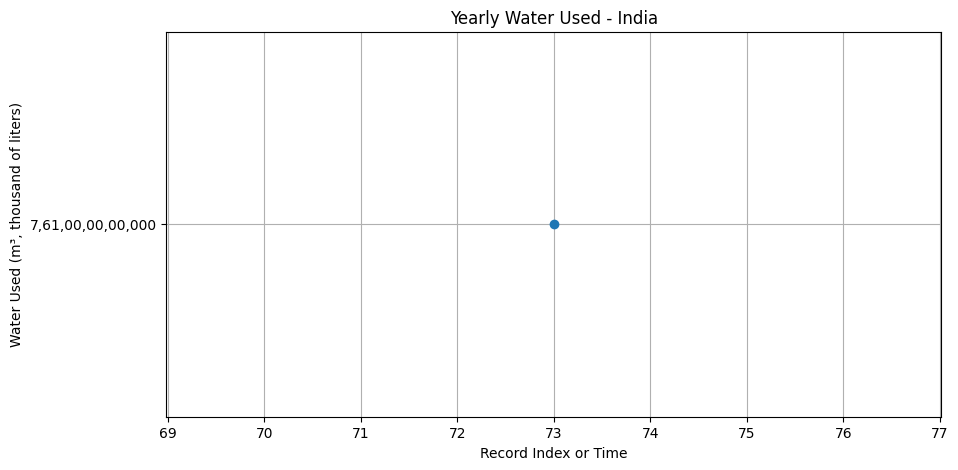

In [27]:
import matplotlib.pyplot as plt

country = 'India'  # change as needed
subset = df_clean[df_clean['Country'] == country]

plt.figure(figsize=(10,5))
plt.plot(subset['Yearly_Water_Used'], marker='o')
plt.title(f'Yearly Water Used - {country}')
plt.xlabel('Record Index or Time')
plt.ylabel('Water Used (m³, thousand of liters)')
plt.grid(True)
plt.show()
